In [11]:
import numpy as np
import matplotlib.pyplot as plt

[0.0, 2.5, 5.0, 7.5]


2.5

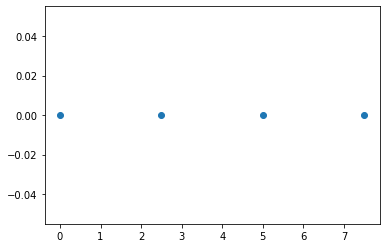

In [2]:
sigma=3.3
e=0.0103
a=2.5
u_0 = [i*a for i in range(4)]

x=np.zeros_like(u_0)
plt.plot(u_0,x,"o")
print(u_0)
a

In [3]:
# define function to find total energy and force
def d_V_lj_dr(r, epsilon, sigma):    
    return (-48 * epsilon * np.power(sigma, 12) / np.power(r, 13) + 24 * epsilon * np.power(sigma, 6) / np.power(r, 7))

def V_lj(r,epsilon, sigma):
    return (4*epsilon * (np.power(sigma, 12) / np.power(r, 12) - np.power(sigma, 6) / np.power(r, 6)))
#find pair interactions r_ij for all 
def V_f(u,e,sigma):    
    V_0=0
   # v=[]
    f_0=0
    #f=[]
    x=u
    for i in range(len(x)):
        for j in range(len(x)):
            if i!=j:
                rij=abs(x[j]-x[i])
                V_0=V_0+0.5*V_lj(rij,e,sigma)
                f_0=f_0+(-d_V_lj_dr(rij,e,sigma))
        #v.append(V_0)
       # f.append(f_0)
    return (V_0,f_0)
V,F=V_f(u_0,e,sigma)  

In [4]:
plt.plot(u_0,v)
plt.plot(u_0,f)

NameError: name 'v' is not defined

In [ ]:
F

In [ ]:
#Inititalise variable
Tol=1e-1;
#step size
A=[]
V_e=[]
a=2.5
u_0 = [i*a for i in range(4)]
V,F=V_f(u_0,e,sigma) 
h=1e-5;
x=a
x0=x

n=0
f_0=F
err=np.sqrt(f_0*f_0)
#// Gradient descent loop
while (err>Tol):
    d=err;
    x = x0 +h*d;
    a=x
    u_n = [i*a for i in range(4)]
    V_n,F_n=V_f(u_n,e,sigma) 
    err= np.sqrt((F_n) * (F_n));
    x0=x;
    A.append(x0)
    V_e.append(V_n)
    n=n+1
    print(a,err,V_n)
#u_min=u_n

In [ ]:
a

In [ ]:
u_min

In [ ]:
a=2.5
u_0 = [i*a for i in range(4)]
x=np.zeros_like(u_0)
plt.plot(u_0,x,"o")
plt.plot(u_min,x,"o")
plt.show()

In [ ]:
plt.plot(u_0,x,"o")
plt.plot(u_min,x,"o")

In [ ]:
plt.plot(A,V_e)

In [56]:
sigma=1
e=1
def d_V_lj_dr(r, epsilon, sigma):    
    return (-48 * epsilon * np.power(sigma, 12) / np.power(r, 13) + 24 * epsilon * np.power(sigma, 6) / np.power(r, 7))

def V_lj(r,epsilon, sigma):
    return (4*epsilon * (np.power(sigma, 12) / np.power(r, 12) - np.power(sigma, 6) / np.power(r, 6)))

#find abs value of force 
def modulus(a):
    sum=0
    for i in a:
        sum=sum+i*i
    
    return np.sqrt(sum)
    
Tol=1e-2
#err=1


N=5
f_s=np.zeros(N)
h=1e-5

E_p=[]
   
#calculate energy
def Enrgy(q_s,N,e, sigma):
    E=0
    for i in range(N):
        for j in range(N):
            if i!=j:
                r_ij=(abs(q_s[i]-q_s[j]))
                E=E+ 0.5*V_lj(r_ij,e, sigma)
    return E

# calculate force
def force(q_s,N,e, sigma):    
    for i in range(N):
        f_0=0
        for j in range(N):
            if i!=j:
                r_ij=abs(q_s[i]-q_s[j])
                f_0=f_0+(-d_V_lj_dr(r_ij,e,sigma))*((q_s[i]-q_s[j])/(abs(q_s[i]-q_s[j])))
        f_s[i]=f_0
    return f_s

a=1
energy=[]
q_s= [i*a for i in range(N)]
fs=(force(q_s,N,e, sigma))
err=modulus(fs)
print(err)
while err>Tol:    
    for i in range(N):        
        q_s[i]=q_s[i]+h*f_s[i]        
    f_s=force(q_s,N,e,sigma)
    
    err=modulus(f_s)
    print(err)
    energy.append(Enrgy(q_s,N,e,sigma))
#print(q_s)
#print(force(q_s,N,e,sigma))
#print(Enrgy(q_s,N,e,sigma))


33.667800985918234
33.51265917113193
33.36023382135266
33.21045793377854
33.063266317157144
32.918595539345176
32.77638387655948
32.63657126425161
32.49909924954545
32.36391094517759
32.23095098488204
32.10016548016985
31.971501978446735
31.84490942242573
31.720338110783104
31.597739660014927
31.47706696745325
31.35827417539954
31.241316636336823
31.126150879182735
31.01273457655022
30.90102651297975
30.790986554110543
30.682575616761067
30.575755639887436
30.47048955639051
30.36674126574713
30.264475607434452
30.163658335126303
30.064256091633414
29.966236384566624
29.869567562698958
29.774218793005456
29.680160038359148
29.587362035863404
29.495796275801155
29.40543498118089
29.316251087864302
29.228218225254295
29.141310697528784
29.055503465404104
28.97077212841031
28.88709290766554
28.804442629132897
28.72279870734613
28.642139129590742
28.5624424405265
28.483687727239086
28.405854604708455
28.328923201680038
28.25287414693049
28.177688555912844
28.103348017773015
28.0298345827254

14.080708792457985
14.066739335612429
14.052794036547471
14.038872832833341
14.02497566226217
14.01110246284668
13.997253172819404
13.98342773063148
13.969626074951647
13.955848144665133
13.942093878872608
13.928363216889146
13.914656098243334
13.900972462676041
13.887312250139546
13.873675400796465
13.860061855018758
13.846471553386783
13.832904436688208
13.819360445917157
13.8058395222731
13.792341607159964
13.778866642185259
13.765414569158809
13.751985330092273
13.738578867197717
13.725195122887015
13.711834039770858
13.698495560657681
13.685179628552891
13.671886186657893
13.658615178369157
13.645366547277487
13.632140237166858
13.618936192013788
13.605754355986258
13.59259467344295
13.579457088932301
13.56634154719173
13.553247993146684
13.540176371909732
13.527126628779968
13.514098709241976
13.501092558964897
13.488108123801853
13.475145349788937
13.462204183144346
13.449284570267745
13.436386457739344
13.42350979231916
13.410654520946059
13.397820590737107
13.38500794898675
13

8.666012593027691
8.659883264711759
8.653761088299
8.647646051546063
8.641538142237577
8.635437348185832
8.629343657230867
8.623257057240247
8.617177536109166
8.61110508176014
8.605039682143193
8.598981325235542
8.592929999041669
8.586885691593126
8.580848390948624
8.574818085193831
8.5687947624413
8.562778410830406
8.556769018527321
8.55076657372491
8.544771064642557
8.538782479526283
8.532800806648531
8.526826034308083
8.520858150830103
8.514897144565964
8.508943003893174
8.50299571721536
8.49705527296219
8.491121659589165
8.48519486557782
8.479274879435364
8.473361689694752
8.467455284914626
8.461555653679197
8.45566278459815
8.449776666306674
8.443897287465317
8.438024636759845
8.432158702901361
8.426299474626052
8.420446940695218
8.414601089895157
8.40876191103716
8.40292939295733
8.397103524516671
8.391284294600823
8.385471692120175
8.37966570600965
8.373866325228786
8.36807353876155
8.362287335616296
8.356507704825745
8.350734635446885
8.344968116560832
8.339208137272921
8.33345

6.044428828790596
6.041000847108199
6.037575926418542
6.034154062752924
6.030735252149453
6.027319490653105
6.023906774315612
6.020497099195473
6.017090461357975
6.013686856875132
6.010286281825723
6.006888732295215
6.003494204375804
6.00010269416639
5.9967141977725245
5.993328711306405
5.989946230886954
5.9865667526396775
5.983190272696666
5.9798167871966825
5.976446292285055
5.973078784113696
5.969714258841069
5.966352712632243
5.962994141658734
5.959638542098648
5.9562859101365815
5.9529362419635925
5.949589533777317
5.946245781781733
5.942904982187393
5.939567131211232
5.936232225076579
5.932900260013201
5.929571232257314
5.926245138051453
5.922921973644564
5.919601735291938
5.916284419255221
5.912970021802393
5.909658539207742
5.906349967751851
5.903044303721603
5.899741543410174
5.896441683117011
5.89314471914779
5.8898506478144395
5.886559465435078
5.8832711683341286
5.879985752842126
5.876703215295815
5.873423552038146
5.870146759418186
5.866872833791167
5.86360177151845
5.8603

4.688254442592585
4.685940561310142
4.683628414265914
4.68131799959082
4.67900931541844
4.6767023598850335
4.674397131129486
4.67209362729337
4.669791846520884
4.667491786958883
4.6651934467568505
4.662896824066913
4.660601917043791
4.658308723844905
4.656017242630242
4.653727471562403
4.651439408806618
4.649153052530693
4.646868400905087
4.644585452102849
4.6423042042995375
4.640024655673394
4.637746804405216
4.6354706486783686
4.633196186678776
4.630923416594971
4.628652336618039
4.6263829449416125
4.6241152397618865
4.621849219277602
4.619584881690035
4.617322225203061
4.615061248023035
4.612801948358849
4.6105443244219755
4.6082883744263405
4.606034096588447
4.603781489127297
4.601530550264367
4.599281278223701
4.597033671231827
4.594787727517714
4.592543445312906
4.590300822851408
4.588059858369702
4.585820550106741
4.583582896303962
4.581346895205284
4.579112545057091
4.576879844108245
4.574648790610029
4.572419382816171
4.5701916189829355
4.5679654973689425
4.565741016235285
4.5

3.5934846820199917
3.591927416082706
3.590371134775999
3.5888158372160417
3.5872615225200066
3.5857081898061387
3.5841558381937344
3.5826044668031294
3.5810540747556785
3.5795046611738073
3.5779562251809636
3.576408765901633
3.5748622824613627
3.5733167739866887
3.571772239605234
3.5702286784455883
3.5686860896374504
3.567144472311474
3.565603825599379
3.5640641486338867
3.5625254405488
3.5609877004788655
3.5594509275598885
3.5579151209287083
3.556380279723161
3.5548464030820917
3.5533134901454075
3.551781540053953
3.5502505519496625
3.548720524975438
3.5471914582751873
3.5456633509938373
3.544136202277297
3.542610011272537
3.5410847771274945
3.5395604989911003
3.538037176013315
3.5365148073450503
3.5349933921382606
3.5334729295458813
3.531953418721816
3.530434858821008
3.5289172489993756
3.527400588413805
3.525884876222192
3.5243701115834174
3.5228562936573242
3.5213434216047905
3.519831494587603
3.518320511768611
3.516810472311606
3.515301375381322
3.5137932201435373
3.51228600576497

2.8895837136424234
2.888444757074952
2.887306433735503
2.8861687431305967
2.88503168476729
2.8838952581531285
2.8827594627961775
2.8816242982049776
2.8804897638886224
2.8793558593566684
2.8782225841191935
2.877089937686781
2.875957919570515
2.8748265292819664
2.8736957663331952
2.872565630236801
2.8714361205058903
2.8703072366540074
2.8691789781952353
2.8680513446441327
2.866924335515805
2.8657979503258044
2.8646721885901916
2.863547049825523
2.862422533548838
2.861298639277706
2.860175366530157
2.8590527148247293
2.857930683680449
2.856809272616799
2.8556884811538037
2.8545683088119596
2.853448755112274
2.8523298195761733
2.85121150172566
2.8500938010831445
2.848976717171588
2.8478602495143988
2.846744397635472
2.845629161059243
2.844514539310548
2.84340053191477
2.842287138397738
2.8411743582857785
2.840062191105722
2.8389506363848134
2.837839693650849
2.836729362432083
2.835619642257239
2.8345105326555267
2.8334020331566183
2.83229414329067
2.831186862588367
2.830080190580772
2.8289

2.311351371541418
2.3105156237272433
2.309680287547171
2.3088453627213834
2.3080108489703193
2.3071767460146266
2.306343053575246
2.3055097713733366
2.3046768991303135
2.3038444365678554
2.3030123834078573
2.3021807393725084
2.3013495041842265
2.3005186775656625
2.299688259239724
2.298858248929563
2.2980286463585746
2.297199451250445
2.2963706633290175
2.2955422823184657
2.294714307943176
2.293886739927758
2.293059577997124
2.2922328218763632
2.291406471290871
2.290580525966238
2.2897549856283494
2.288929850003263
2.28810511881734
2.2872807917971634
2.286456868669577
2.28563334916163
2.284810233000652
2.2839875199141924
2.2831652096300634
2.2823433018762933
2.2815217963811705
2.2807006928732085
2.279879991081199
2.2790596907341203
2.278239791561203
2.277420293291959
2.2766011956561054
2.2757824983836095
2.274964201204663
2.274146303849712
2.2733288060494354
2.2725117075347683
2.2716950080368337
2.2708787072870686
2.2700628050170906
2.2692473009587824
2.268432194844223
2.267617486405782

1.9166794904426965
1.9160295201778086
1.9153798415777186
1.9147304544644035
1.9140813586600434
1.9134325539869206
1.9127840402674758
1.9121358173242669
1.911487884980018
1.910840243057578
1.910192891379965
1.9095458297703072
1.9088990580518717
1.9082525760481082
1.9076063835825734
1.9069604804789617
1.9063148665611154
1.905669541653043
1.905024505578844
1.9043797581628075
1.9037352992293277
1.9030911286029653
1.9024472461083979
1.9018036515704635
1.9011603448141046
1.9005173256644308
1.8998745939467072
1.8992321494863103
1.8985899921087446
1.8979481216397045
1.8973065379049634
1.896665240730465
1.8960242299422967
1.8953835053666537
1.8947430668299188
1.8941029141585684
1.8934630471792522
1.8928234657187093
1.8921841696038821
1.8915451586617669
1.8909064327195721
1.8902679916046254
1.8896298351443697
1.888991963166386
1.8883543754984098
1.8877170719683292
1.8870800524041131
1.886443316633926
1.8858068644860244
1.885170695788832
1.8845348103708954
1.8838992080608874
1.883263888687649
1.8

1.6389502118758925
1.6384205628042339
1.6378911349232204
1.6373619281089062
1.6368329422374917
1.6363041771851714
1.635775632828309
1.6352473090433515
1.6347192057068032
1.6341913226952742
1.6336636598854781
1.633136217154192
1.6326089943783093
1.6320819914348015
1.631555208200716
1.6310286445532043
1.6305023003695274
1.6299761755270075
1.629450269903067
1.6289245833752097
1.6283991158210493
1.627873867118247
1.627348837144605
1.6268240257779887
1.6262994328963403
1.6257750583777268
1.6252509021002635
1.6247269639421775
1.6242032437817808
1.6236797414974822
1.6231564569677632
1.6226333900711993
1.6221105406864704
1.6215879086923222
1.621065493967583
1.6205432963912016
1.6200213158422083
1.619499552199673
1.6189780053428249
1.618456675150941
1.61793556150338
1.617414664279599
1.6168939833591618
1.6163735186216823
1.6158532699469081
1.6153332372146307
1.6148134203047433
1.614293819097231
1.613774433472152
1.6132552633096804
1.6127363084900739
1.612217568893644
1.6116990444008101
1.611180

1.3898835603952562
1.3894544317862372
1.3890254703072817
1.388596675872371
1.3881680483955745
1.3877395877910252
1.3873112939729055
1.3868831668554367
1.3864552063529114
1.386027412379687
1.3855997848501538
1.3851723236787992
1.3847450287801422
1.3843179000687673
1.3838909374592758
1.3834641408664092
1.3830375102048824
1.382611045389525
1.3821847463351715
1.3817586129567736
1.3813326451692969
1.3809068428877678
1.380481206027298
1.3800557345030307
1.3796304282301621
1.3792052871239553
1.3787803110997177
1.3783555000728338
1.3779308539587292
1.3775063726728956
1.3770820561308925
1.3766579042483007
1.3762339169407647
1.3758100941240154
1.3753864357138257
1.3749629416259885
1.3745396117764332
1.3741164460810509
1.373693444455845
1.3732706068168754
1.372847933080248
1.3724254231621056
1.3720030769786806
1.3715808944462324
1.371158875481097
1.3707370199996594
1.370315327918339
1.3698937991536329
1.3694724336221182
1.3690512312403715
1.3686301919250674
1.3682093155929127
1.3677886021606864
1

1.193459478790471
1.1931046583428975
1.1927499681396878
1.1923954081186317
1.1920409782175418
1.1916866783742606
1.1913325085267297
1.1909784686128604
1.1906245585706514
1.1902707783380866
1.1899171278532483
1.189563607054226
1.1892102158791207
1.1888569542661491
1.1885038221534636
1.1881508194793604
1.18779794618209
1.187445202199987
1.1870925874714144
1.1867401019347537
1.1863877455284404
1.18603551819096
1.1856834198608226
1.1853314504765586
1.184979609976775
1.1846278983001022
1.1842763153851952
1.18392486117074
1.1835735355954773
1.183222338598195
1.1828712701177122
1.1825203300928595
1.1821695184625474
1.1818188351656922
1.1814682801412597
1.181117853328247
1.1807675546657037
1.1804173840926893
1.1800673415483403
1.1797174269717947
1.1793676403022382
1.1790179814788977
1.1786684504410532
1.1783190471279876
1.1779697714790494
1.1776206234336168
1.1772716029310972
1.1769227099109503
1.1765739443126577
1.1762253060757375
1.1758767951397637
1.175528411444325
1.1751801549290628
1.1748

1.040051123714533
1.0397512679412
1.0394515169526928
1.0391518707020486
1.038852329142313
1.0385528922265526
1.0382535599078757
1.037954332139412
1.037655208874323
1.0373561900657962
1.0370572756670466
1.0367584656313078
1.0364597599118366
1.036161158461939
1.0358626612349309
1.0355642681841561
1.0352659792629935
1.0349677944248372
1.0346697136231107
1.0343717368112844
1.034073863942835
1.033776094971269
1.0334784298501059
1.033180868532914
1.0328834109732978
1.032586057124857
1.0322888069412406
1.0319916603761081
1.0316946173831565
1.0313976779161107
1.031100841928716
1.0308041093747544
1.0305074802080216
1.0302109543823543
1.0299145318515928
1.0296182125696147
1.0293219964903568
1.0290258835677157
1.028729873755682
1.0284339670082199
1.0281381632793614
1.02784246252313
1.0275468646936157
1.0272513697448769
1.026955977631057
1.0266606883063008
1.026365501724771
1.0260704178406692
1.0257754366082177
1.0254805579816655
1.025185781915305
1.0248911083634078
1.0245965372803474
1.0243020686

0.8942392519524093
0.8939891243332327
0.8937390799023683
0.8934891186249141
0.8932392404659412
0.8929894453905612
0.8927397333639167
0.8924901043511307
0.8922405583173786
0.8919910952278315
0.8917417150477134
0.8914924177422323
0.8912432032766227
0.8909940716161727
0.8907450227261214
0.8904960565717868
0.8902471731184736
0.8899983723315215
0.8897496541762763
0.8895010186181107
0.8892524656224282
0.8890039951546223
0.8887556071801052
0.8885073016643414
0.888259078572782
0.8880109378709157
0.8877628795242347
0.8875149034982727
0.8872670097585461
0.88701919827063
0.8867714690000814
0.8865238219124983
0.8862762569735017
0.8860287741486996
0.8857813734037535
0.8855340547043188
0.8852868180160978
0.8850396633047813
0.8847925905360835
0.8845455996757473
0.8842986906895358
0.8840518635432195
0.8838051182025992
0.8835584546334865
0.8833118728016947
0.8830653726731001
0.882818954213542
0.8825726173889151
0.8823263621651387
0.8820801885081292
0.8818340963838104
0.8815880857581493
0.88134215659713

0.7723180757049191
0.7721076338829542
0.7718972590617609
0.7716869512148167
0.7714767103156432
0.7712665363377618
0.7710564292546958
0.7708463890400106
0.7706364156672453
0.7704265091099943
0.770216669341818
0.7700068963363483
0.769797190067171
0.7695875505079381
0.7693779776322582
0.7691684714138055
0.7689590318262383
0.7687496588432424
0.7685403524385063
0.7683311125857412
0.7681219392586652
0.7679128324310075
0.7677037920765113
0.7674948181689237
0.7672859106820442
0.7670770695896467
0.7668682948655203
0.7666595864834758
0.7664509444173505
0.7662423686409834
0.7660338591282103
0.7658254158529101
0.7656170387889346
0.7654087279102065
0.7652004831906108
0.7649923046040453
0.7647841921244716
0.7645761457258207
0.764368165382041
0.7641602510671064
0.7639524027549863
0.7637446204196948
0.7635369040352297
0.763329253575604
0.763121669014857
0.7629141503270435
0.762706697486214
0.7624993104664338
0.7622919892418013
0.7620847337864077
0.7618775440743581
0.7616704200797882
0.7614633617768257

0.6745789492897033
0.6743990675934439
0.6742192411074515
0.6740394698109818
0.6738597536833009
0.6736800927036721
0.6735004868513703
0.6733209361057001
0.6731414404459658
0.6729619998514604
0.6727826143015255
0.6726032837754794
0.672424008252662
0.67224478771244
0.6720656221341436
0.6718865114971628
0.6717074557808617
0.6715284549646428
0.6713495090279128
0.6711706179500644
0.6709917817105243
0.6708130002887103
0.6706342736640729
0.6704556018160559
0.6702769847241227
0.6700984223677225
0.6699199147263355
0.6697414617794534
0.6695630635065858
0.6693847198872245
0.6692064309008774
0.6690281965270974
0.668850016745383
0.6686718915353027
0.6684938208764144
0.6683158047482552
0.668137843130424
0.6679599360024895
0.6677820833440545
0.6676042851347042
0.6674265413540721
0.6672488519817683
0.6670712169974179
0.6668936363806905
0.6667161101112067
0.6665386381686297
0.6663612205326228
0.6661838571828917
0.6660065480991101
0.6658292932609704
0.665652092648183
0.6654749462404631
0.6652978540175558

0.5903469005026551
0.5901924548611848
0.5900380550897787
0.5898837011719814
0.5897293930913634
0.5895751308315237
0.5894209143760089
0.5892667437084383
0.5891126188123701
0.5889585396714456
0.5888045062692443
0.5886505185893953
0.5884965766155307
0.5883426803312671
0.5881888297202649
0.5880350247661615
0.5878812654525927
0.5877275517632551
0.5875738836817875
0.5874202611918777
0.5872666842772202
0.5871131529214914
0.5869596671083849
0.5868062268216113
0.5866528320448862
0.5864994827619262
0.5863461789564712
0.586192920612238
0.5860397077129684
0.5858865402424303
0.5857334181843641
0.5855803415225326
0.585427310240715
0.5852743243226742
0.5851213837522086
0.584968488513112
0.5848156385891774
0.5846628339642082
0.584510074622026
0.5843573605464573
0.5842046917213228
0.5840520681304667
0.5838994897577017
0.5837469565869181
0.583594468601943
0.5834420257866696
0.5832896281249516
0.583137275600666
0.5829849681976963
0.582832705899948
0.582680488691315
0.5825283165557084
0.5823761894770344
0

0.5146702860957251
0.5145379779673069
0.5144057079479928
0.514273476024741
0.5141412821844887
0.514009126414198
0.5138770087008331
0.5137449290313549
0.5136128873927431
0.5134808837719611
0.5133489181560058
0.5132169905318616
0.513085100886529
0.5129532492070095
0.5128214354802864
0.5126896596934045
0.5125579218333558
0.5124262218871599
0.5122945598418528
0.5121629356844717
0.5120313494020647
0.5118998009816644
0.5117682904103101
0.51163681767507
0.5115053827629955
0.5113739856611632
0.511242626356639
0.5111113048364981
0.5109800210878229
0.5108487750977156
0.5107175668532471
0.5105863963415344
0.5104552635496736
0.5103241684647737
0.5101931110739464
0.5100620913643189
0.5099311093230188
0.5098001649371738
0.5096692581939207
0.5095383890803911
0.5094075575837613
0.5092767636911593
0.5091460073897539
0.5090152886667052
0.5088846075091956
0.5087539639043737
0.5086233578394322
0.5084927893015659
0.5083622582779563
0.5082317647558067
0.5081013087223212
0.5079708901646904
0.5078405090701481

0.45221077871558246
0.4520962294487903
0.4519817123244023
0.4518672273318151
0.45175277446046286
0.4516383536997759
0.45152396503916675
0.4514096084680829
0.4512952839759555
0.4511809915522136
0.45106673118631674
0.4509525028677176
0.4508383065858671
0.4507241423302266
0.4506100100902593
0.4504959098554211
0.4503818416152076
0.450267805359081
0.4501538010765117
0.4500398287569968
0.44992588839001996
0.44981197996507344
0.44969810347164935
0.44958425889924963
0.4494704462373963
0.4493566654755843
0.4492429166033298
0.4491291996101551
0.44901551448556287
0.4489018612190979
0.4487882398002905
0.448674650218672
0.44856109246379455
0.44844756652518153
0.44833407239238365
0.44822061005496855
0.4481071795024937
0.4479937807244847
0.4478804137105409
0.44776707845022334
0.4476537749330899
0.4475405031487347
0.4474272630867265
0.4473140547366631
0.4472008780881262
0.44708773313070604
0.4469746198540127
0.44686153824762953
0.44674848830118685
0.44663547000428
0.4465224833465241
0.4464095283175513

0.39664892673100693
0.3965497840416941
0.39645066851330124
0.39635158013720456
0.3962525189047905
0.3961534848074377
0.3960544778365391
0.39595549798349405
0.3958565452397171
0.3957576195965979
0.3956587210455377
0.3955598495779462
0.3954610051852446
0.39536218785882876
0.39526339759013407
0.3951646343705729
0.3950658981915783
0.3949671890445842
0.394868506921004
0.39476985181229507
0.39467122370986896
0.39457262260518505
0.394474048489691
0.3943755013548265
0.3942769811920413
0.3941784879928012
0.3940800217485483
0.3939815824507576
0.39388317009088847
0.3937847846604029
0.39368642615078464
0.39358809455350335
0.39348978986002386
0.3933915120618591
0.39329326115046037
0.3931950371173397
0.3930968399539602
0.3929986696518421
0.3929005262024749
0.39280240959734325
0.3927043198279857
0.3926062568858804
0.39250822076254294
0.3924102114494959
0.3923122289382436
0.392214273220317
0.39211634428723474
0.3920184421305288
0.3919205667417164
0.39182271811232977
0.3917248962339374
0.39162710109804

0.3511626041745147
0.35107579902683944
0.3509890171863858
0.3509022586459917
0.35081552339850414
0.35072881143676865
0.35064212275362244
0.35055545734189875
0.35046881519446893
0.35038219630417916
0.3502956006638785
0.3502090282664162
0.35012247910467303
0.3500359531715088
0.34994945045978687
0.34986297096235874
0.3497765146721183
0.34969008158192816
0.34960367168466316
0.3495172849732061
0.34943092144043114
0.3493445810792378
0.3492582638824976
0.3491719698431198
0.3490856989539697
0.34899945120796677
0.3489132265979814
0.3488270251169277
0.3487408467577101
0.3486546915132427
0.34856855937642023
0.34848245034015757
0.34839636439736105
0.34831030154095205
0.34822426176384635
0.34813824505895863
0.34805225141923585
0.34796628083757153
0.34788033330691737
0.3477944088201956
0.34770850737034925
0.34762262895030466
0.347536773552998
0.3474509411713831
0.34736513179839057
0.3472793454269698
0.3471935820500803
0.34710784166065667
0.3470221242516753
0.34693642981607686
0.3468507583468289
0.34

0.31136303127507875
0.31128681724207174
0.31121062330742755
0.3111344494651858
0.3110582957093119
0.31098216203382806
0.31090604843273667
0.310829954900048
0.3107538814297822
0.3106778280159185
0.3106017946525085
0.31052578133355474
0.310449788053071
0.31037381480507203
0.31029786158361167
0.31022192838269386
0.31014601519633256
0.3100701220185819
0.30999424884345544
0.3099183956649996
0.30984256247725045
0.30976674927423925
0.3096909560500091
0.3096151827986042
0.3095394295140693
0.30946369619043923
0.3093879828217718
0.3093122894021159
0.309236615925529
0.30916096238605945
0.30908532877777084
0.3090097150947136
0.3089341213309589
0.30885854748056224
0.30878299353760064
0.308707459496127
0.30863194535022015
0.3085564510939385
0.3084809767213688
0.3084055222265891
0.308330087603664
0.3082546728466874
0.30817927794973915
0.30810390290689116
0.30802854771224564
0.3079532123598839
0.30787789684388883
0.3078026011583676
0.30772732529741537
0.3076520692551113
0.3075768330255743
0.3075016166

0.2807094605292373
0.28064127358527047
0.2805731043705619
0.2805049528799302
0.2804368191082121
0.28036870305023703
0.2803006047008331
0.2802325240548376
0.280164461107106
0.2800964158524517
0.28002838828573695
0.2799603784017864
0.2798923861954617
0.279824411661591
0.27975645479503586
0.2796885155906396
0.27962059404326184
0.27955269014775586
0.27948480389896757
0.27941693529175754
0.27934908432098615
0.27928125098149803
0.2792134352681861
0.2791456371758787
0.27907785669947344
0.2790100938338224
0.2789423485737881
0.278874620914262
0.2788069108500968
0.2787392183761709
0.2786715434873716
0.27860388617856435
0.2785362464446423
0.2784686242804625
0.2784010196809423
0.2783334326409362
0.278265863155349
0.27819831121906646
0.278130776826974
0.27806325997396186
0.2779957606549376
0.2779282788647795
0.27786081459840684
0.2777933678506882
0.2777259386165366
0.27765852689086984
0.2775911326685861
0.27752375594457646
0.27745639671376626
0.27738905497104926
0.27732173071135124
0.27725442392957

0.24872501465828545
0.24866508222278425
0.24860516513828249
0.24854526340043384
0.24848537700487539
0.24842550594723797
0.24836565022315094
0.24830580982826173
0.24824598475820667
0.2481861750086284
0.2481263805751645
0.248066601453463
0.2480068376391652
0.24794708912794622
0.2478873559154254
0.2478276379972604
0.2477679353690996
0.24770824802660604
0.2476485759654251
0.24758891918121212
0.24752927766962418
0.24746965142633007
0.24741004044698034
0.24735044472724635
0.24729086426278474
0.24723129904926075
0.24717174908234338
0.24711221435769054
0.24705269487097592
0.24699319061788183
0.24693370159406408
0.24687422779520204
0.24681476921697218
0.24675532585505444
0.24669589770510575
0.24663648476282907
0.24657708702390005
0.2465177044840033
0.24645833713880957
0.24639898498401075
0.2463396480152886
0.24628032622832904
0.24622101961882764
0.24616172818248305
0.24610245191496632
0.24604319081197962
0.24598394486922628
0.24592471408238378
0.24586549844717606
0.24580629795928505
0.245747112

0.21895720785327044
0.21890484647030223
0.21885249831000902
0.2188001633686933
0.2187478416426882
0.21869553312831072
0.21864323782191644
0.21859095571981804
0.2185386868183691
0.21848643111388252
0.21843418860270508
0.21838195928118725
0.2183297431456354
0.21827754019242102
0.21822535041787358
0.21817317381833023
0.21812101039013596
0.21806886012964244
0.21801672303319752
0.21796459909713659
0.21791248831780755
0.21786039069155824
0.21780830621474706
0.2177562348837228
0.2177041766948346
0.21765213164443806
0.21760009972890243
0.21754808094456024
0.21749607528778728
0.21744408275493166
0.2173921033423503
0.21734013704641036
0.217288183863477
0.21723624378989762
0.21718431682205458
0.2171324029563006
0.21708050218900646
0.2170286145165321
0.21697673993526922
0.216924878441563
0.21687303003181202
0.2168211947023606
0.21676937244959948
0.21671756326989217
0.2166657671596332
0.21661398411517205
0.21656221413290974
0.21651045720921264
0.21645871334047512
0.21640698252305002
0.2163552647533

0.1926975020761307
0.19265173013167702
0.1926059695996775
0.19256022047702703
0.19251448276061997
0.1924687564473761
0.19242304153418713
0.19237733801795145
0.19233164589558346
0.19228596516397337
0.19224029582003815
0.1921946378606824
0.19214899128282042
0.19210335608335719
0.1920577322592007
0.19201211980726898
0.19196651872445725
0.1919209290077003
0.1918753506538937
0.19182978365996722
0.19178422802282652
0.19173868373938818
0.19169315080657162
0.19164762922130354
0.19160211898049137
0.19155662008106777
0.19151113251994795
0.19146565629404355
0.19142019140029984
0.19137473783562176
0.19132929559693895
0.19128386468118241
0.1912384450852747
0.1911930368061605
0.1911476398407501
0.19110225418597643
0.19105687983877973
0.1910115167960741
0.1909661650548165
0.19092082461192317
0.19087549546432434
0.19083017760897045
0.19078487104280176
0.1907395757627447
0.1906942917657466
0.19064901904874196
0.19060375760865989
0.19055850744246414
0.19051326854708078
0.19046804091945213
0.190422824556

0.16647042381723035
0.1664311493020332
0.1663918844536998
0.16635262926965114
0.16631338374731597
0.1662741478841416
0.16623492167755424
0.16619570512499995
0.16615649822389264
0.16611730097168845
0.16607811336582062
0.16603893540372702
0.16599976708284808
0.1659606084006204
0.16592145935449545
0.16588231994189656
0.1658431901602849
0.1658040700071013
0.1657649594797646
0.1657258585757459
0.16568676729247506
0.16564768562741738
0.1656086135779956
0.1655695511416855
0.16553049831591232
0.16549145509814145
0.16545242148580824
0.16541339747637696
0.1653743830672995
0.16533537825601996
0.16529638303999353
0.16525739741667167
0.16521842138351148
0.1651794549379622
0.1651404980774983
0.1651015507995489
0.16506261310159218
0.16502368498108316
0.16498476643548587
0.1649458574622395
0.16490695805882802
0.1648680682226985
0.1648291879513282
0.1647903172421559
0.1647514560926678
0.16471260450032377
0.1646737624625932
0.16463492997693294
0.16459610704081123
0.16455729365168936
0.16451848980705353


0.14605505674048574
0.14602078176836808
0.14598651514705954
0.14595225687436222
0.14591800694812238
0.14588376536616107
0.1458495321262947
0.14581530722633892
0.1457810906641443
0.14574688243752107
0.1457126825442959
0.14567849098228466
0.14564430774932877
0.14561013284325347
0.14557596626189437
0.14554180800307262
0.14550765806461696
0.14547351644435932
0.14543938314013552
0.14540525814977845
0.14537114147111213
0.14533703310197676
0.1453029330402066
0.14526884128362494
0.14523475783007359
0.14520068267738387
0.14516661582340404
0.14513255726596777
0.14509850700291027
0.1450644650320625
0.14503043135127208
0.14499640595838603
0.14496238885122492
0.14492838002764827
0.14489437948548553
0.14486038722258035
0.1448264032367689
0.1447924275259136
0.14475846008784013
0.14472450092039946
0.14469055002143252
0.1446566073887914
0.14462267302033016
0.14458874691388243
0.14455482906730133
0.14452091947843385
0.14448701814511983
0.14445312506523517
0.14441924023659422
0.14438536365706303
0.144351

0.13006771065263703
0.13003731525869353
0.13000692721085644
0.12997654650725055
0.12994617314598103
0.1299158071251596
0.12988544844291253
0.12985509709733686
0.12982475308656102
0.12979441640867284
0.1297640870618225
0.129733765044106
0.12970345035365055
0.12967314298856258
0.1296428429469583
0.1296125502269625
0.12958226482669746
0.12955198674426752
0.12952171597779705
0.12949145252542327
0.12946119638524728
0.1294309475553901
0.12940070603398132
0.12937047181913403
0.12934024490899063
0.1293100253016633
0.12927981299526778
0.1292496079879334
0.12921941027779676
0.12918921986296344
0.12915903674157783
0.12912886091174305
0.1290986923716161
0.12906853111929564
0.12903837715292377
0.12900823047062626
0.12897809107054134
0.1289479589507912
0.12891783410951835
0.1288877165448267
0.12885760625485904
0.12882750323775752
0.1287974074916457
0.12876731901465163
0.12873723780492136
0.12870716386057932
0.128677097179763
0.1286470377606122
0.12861698560126253
0.12858694069983534
0.12855690305448

0.11577562680136691
0.11574867310450782
0.11572172587475654
0.11569478511046875
0.11566785081000171
0.11564092297171008
0.11561400159397273
0.1155870866751331
0.11556017821356268
0.11553327620761988
0.11550638065565244
0.11547949155604967
0.11545260890715578
0.11542573270735124
0.11539886295498462
0.1153719996484267
0.11534514278603922
0.11531829236619666
0.11529144838726299
0.11526461084759644
0.11523777974557126
0.11521095507954923
0.11518413684790849
0.11515732504900218
0.1151305196812108
0.11510372074290424
0.1150769282324447
0.11505014214820343
0.11502336248855782
0.1149965892518739
0.1149698224365294
0.11494306204087693
0.11491630806331234
0.11488956050220353
0.11486281935591132
0.11483608462283114
0.1148093563013111
0.11478263438975225
0.11475591888651593
0.1147292097899735
0.11470250709850344
0.11467581081048264
0.11464912092429007
0.1146224374383134
0.1145957603509148
0.11456908966047778
0.11454242536537901
0.11451576746400297
0.1144891159547412
0.11446247083594566
0.114435832

0.10259548038825238
0.10257167841921964
0.10254788212260052
0.10252409149696293
0.1025003065408837
0.1024765272529418
0.10245275363171746
0.1024289856758021
0.1024052233837737
0.10238146675420441
0.10235771578568298
0.10233397047678447
0.1023102308260847
0.10228649683218456
0.1022627684936604
0.10223904580909561
0.10221532877706126
0.102191617396151
0.10216791166496032
0.10214421158205267
0.10212051714602843
0.10209682835546931
0.10207314520896493
0.10204946770509006
0.10202579584244494
0.10200212961960964
0.10197846903516979
0.10195481408771634
0.10193116477584177
0.10190752109812781
0.10188388305316204
0.10186025063954883
0.10183662385585865
0.1018130027006833
0.1017893871726347
0.10176577727029124
0.10174217299222772
0.10171857433706603
0.10169498130337758
0.10167139388975174
0.10164781209480533
0.10162423591710938
0.10160066535526593
0.10157710040787216
0.10155354107350373
0.10152998735078587
0.10150643923829725
0.10148289673462041
0.1014593598383779
0.10143582854815321
0.101412302

0.09011436401464408
0.09009352695326438
0.09007269482574735
0.09005186763087747
0.09003104536743084
0.09001022803418536
0.08998941562992623
0.08996860815342085
0.08994780560347694
0.08992700797885321
0.0899062152783384
0.08988542750069564
0.0898646446447237
0.08984386670920975
0.08982309369291124
0.08980232559463869
0.08978156241315988
0.08976080414725116
0.08974005079570661
0.08971930235730799
0.08969855883084485
0.08967782021508729
0.08965708650883655
0.08963635771086213
0.0896156338199653
0.08959491483491122
0.0895742007544971
0.089553491577509
0.08953278730273395
0.08951208792895828
0.08949139345497377
0.08947070387956226
0.08945001920150444
0.08942933941960378
0.08940866453263673
0.0893879945394075
0.08936732943867756
0.08934666922926453
0.089326013909944
0.08930536347951451
0.08928471793675223
0.0892640772804687
0.08924344150943347
0.08922281062245374
0.08920218461830573
0.0891815634958034
0.08916094725372126
0.0891403358908551
0.08911972940599333
0.08909912779793655
0.0890785310

0.07852905526245416
0.07851095317034248
0.07849285533872188
0.07847476176652139
0.07845667245272216
0.07843858739627212
0.07842050659612598
0.07840243005126118
0.07838435776061282
0.07836628972315411
0.07834822593783912
0.07833016640361398
0.07831211111946619
0.07829406008432839
0.07827601329718192
0.07825797075697445
0.07823993246265938
0.07822189841322082
0.0782038686075949
0.0781858430447658
0.07816782172367387
0.07814980464329688
0.0781317918025785
0.07811378320050175
0.07809577883602044
0.07807777870809898
0.07805978281569807
0.07804179115777903
0.07802380373331484
0.07800582054126033
0.07798784158058654
0.07796986685024523
0.0779518963492195
0.07793393007646983
0.07791596803096304
0.07789801021165266
0.07788005661750687
0.07786210724749452
0.07784416210058973
0.07782622117575379
0.07780828447195519
0.07779035198815888
0.07777242372332457
0.07775449967644468
0.07773657984645056
0.07771866423233463
0.07770075283307486
0.07768284564762566
0.07766494267495162
0.07764704391403535
0.07

0.07005301245995355
0.07003690086310811
0.07002079304145387
0.07000468899406186
0.06998858872001851
0.0699724922184222
0.06995639948833911
0.06994031052887593
0.06992422533909771
0.06990814391809726
0.06989206626495441
0.0698759923787676
0.06985992225861308
0.06984385590357729
0.06982779331273993
0.06981173448519784
0.06979567942002543
0.06977962811633236
0.06976358057317683
0.06974753678967265
0.06973149676489307
0.06971546049792444
0.06969942798785354
0.06968339923378374
0.06966737423478543
0.06965135298995348
0.06963533549837717
0.06961932175914666
0.06960331177134928
0.06958730553406671
0.0695713030464112
0.06955530430745918
0.06953930931630393
0.06952331807201814
0.0695073305737199
0.0694913468204804
0.0694753668114095
0.06945939054558092
0.06944341802210117
0.06942744924004966
0.06941148419852064
0.06939552289660379
0.06937956533339615
0.06936361150800333
0.06934766141950363
0.06933171506699304
0.06931577244956773
0.06929983356630944
0.06928389841633018
0.06926796699872025
0.0692

0.06255021069684068
0.06253585365815678
0.06252149997027603
0.06250714963237712
0.062492802643667134
0.06247845900332956
0.06246411871055799
0.062449781764553874
0.0624354481644994
0.062421117909602
0.06240679099905075
0.06239246743202974
0.06237814720773614
0.062363830325382466
0.06234951678413493
0.06233520658320361
0.0623208997218029
0.06230659619909736
0.062292296014298455
0.06227799916658804
0.06226370565518002
0.06224941547926024
0.062235128638030525
0.062220845130690455
0.062206564956424626
0.062192288114428125
0.0621780146039192
0.062163744424077405
0.062149477574103905
0.0621352140532014
0.06212095386056797
0.06210669699539961
0.06209244345688193
0.06207819324422988
0.062063946356634224
0.062049702793308396
0.06203546255344856
0.06202122563623405
0.0620069920408787
0.06199276176658588
0.0619785348125498
0.06196431117797587
0.06195009086205851
0.061935873863996065
0.06192166018300297
0.06190744981825844
0.061893242768997304
0.06187903903439446
0.061864838613663216
0.06185064150

0.05568411314992948
0.055671355693257756
0.05565860120326532
0.05564584967922866
0.05563310112044239
0.05562035552620394
0.05560761289577771
0.055594873228490826
0.055582136523611596
0.05556940278043697
0.05555667199825762
0.055543944176362894
0.05553121931404742
0.05551849741059821
0.05550577846531247
0.055493062477487975
0.05548034944640581
0.055467639371365826
0.05545493225165509
0.05544222808657243
0.0554295268754078
0.055416828617454
0.05540413331200381
0.05539144095835737
0.05537875155579997
0.05536606510362813
0.0553533816011392
0.05534070104761834
0.05532802344236604
0.05531534878468294
0.05530267707386048
0.05529000830918872
0.055277342489967685
0.05526467961548884
0.055252019685061084
0.05523936269795145
0.05522670865347826
0.05521405755094068
0.05520140938961776
0.055188764168824865
0.05517612188783719
0.05516348254597357
0.055150846142512526
0.0551382126767666
0.055125582148023614
0.055112954555580365
0.05510032989874845
0.055087708176802905
0.05507508938906552
0.0550624735

0.04999178554129207
0.04998034980685704
0.049968916723712134
0.049957486291214895
0.04994605850874475
0.04993463337565054
0.049923210891320347
0.04991179105511449
0.049900373866415
0.049888959324574884
0.04987754742897806
0.04986613817898678
0.04985473157397587
0.04984332761332309
0.04983192629637992
0.04982052762253888
0.049809131591155055
0.0497977382016033
0.049786347453264754
0.049774959345502
0.04976357387768496
0.049752191049196794
0.04974081085940034
0.049729433307664876
0.04971805839337147
0.049706686115885135
0.04969531647458945
0.04968394946884864
0.04967258509803787
0.049661223361528804
0.049649864258696934
0.04963850778891943
0.04962715395156811
0.04961580274600487
0.0496044541716207
0.04959310822777634
0.0495817649138552
0.04957042422923865
0.04955908617328929
0.049547750745379274
0.04953641794488596
0.04952508777119211
0.04951376022367449
0.049502435301690906
0.04949111300463372
0.04947979333187114
0.04946847628278996
0.049457161856748165
0.04944585005313877
0.04943454087

0.044297567471048585
0.044287449896703295
0.04427733466092517
0.044267221763151794
0.044257111202845034
0.04424700297944345
0.04423689709239153
0.04422679354114611
0.0442166923251466
0.04420659344384694
0.04419649689668191
0.044186402683096954
0.04417631080256269
0.0441662212545149
0.04415613403839779
0.044146049153668813
0.04413596659977382
0.0441258863761595
0.044115808482277426
0.04410573291756749
0.04409565968148256
0.04408558877348241
0.044075520193014035
0.04406545393950744
0.04405539001242762
0.04404532841123711
0.04403526913536534
0.044025212184261794
0.04401515755739673
0.044005105254201864
0.04399505527414285
0.04398500761665449
0.04397496228119061
0.04396491926721291
0.04395487857416102
0.0439448402014857
0.04393480414864824
0.043924770415100095
0.043914739000276
0.043904709903646554
0.043894683124657004
0.04388465866276434
0.043874636517403316
0.043864616688046816
0.04385459917414128
0.04384458397513665
0.04383457109048042
0.04382456051963573
0.04381455226204414
0.043804546

0.03947435128753187
0.03946534711210439
0.0394563450125344
0.039447344988322156
0.03943834703898177
0.039429351164019855
0.03942035736296893
0.03941136563531915
0.039402375980595594
0.03939338839830497
0.03938440288795273
0.03937541944906296
0.03936643808113844
0.03935745878370636
0.03934848155627076
0.03933950639834183
0.03933053330943481
0.03932156228905498
0.039312593336723684
0.03930362645196217
0.03929466163426833
0.03928569888316269
0.03927673819816541
0.03926777957876564
0.039258823024508595
0.03924986853489445
0.03924091610943875
0.03923196574764738
0.03922301744904572
0.039214071213149904
0.039205127039457846
0.03919618492750773
0.03918724487679267
0.03917830688684674
0.039169370957182294
0.03916043708730817
0.03915150527672436
0.03914257552497106
0.03913364783155354
0.03912472219599639
0.0391157986177936
0.0391068770964874
0.03909795763157673
0.03908904022257496
0.03908012486901565
0.03907121157039944
0.03906230032624714
0.03905339113608086
0.03904448399941376
0.0390355789157

0.035213383082704094
0.035205360124878744
0.035197339012464426
0.03518931974503262
0.035181302322164494
0.03517328674339554
0.03516527300831158
0.03515726111648635
0.035149251067480625
0.035141242860865465
0.035133236496218516
0.03512523197308362
0.035117229291047
0.03510922844966205
0.03510122944852037
0.03509323228716935
0.035085236965192446
0.03507724348215024
0.0350692518376204
0.03506126203115777
0.03505327406235275
0.03504528793076024
0.0350373036359533
0.035029321177505436
0.035021340554973565
0.035013361767938456
0.035005384815973394
0.03499740969864265
0.03498943641551416
0.03498146496615927
0.03497349535014876
0.03496552756705733
0.03495756161645495
0.034949597497901407
0.034941635210980884
0.03493367475526085
0.03492571613031415
0.03491775933570633
0.034909804371006166
0.034901851235797574
0.03489389992964152
0.03488595045210408
0.034878002802777044
0.034870056981210935
0.03486211298699497
0.034854170819691575
0.03484623047886666
0.03483829196409997
0.03483035527496943
0.034

0.03143773696583616
0.03143058159020045
0.031423427857083
0.031416275766104125
0.03140912531687808
0.03140197650900629
0.031394829342117465
0.03138768381583713
0.03138053992977446
0.03137339768353674
0.03136625707675207
0.03135911810904073
0.03135198078001654
0.03134484508929008
0.031337711036489205
0.031330578621227394
0.031323447843119204
0.03131631870178563
0.03130919119684816
0.0313020653279287
0.031294941094628465
0.031287818496584296
0.031280697533397774
0.031273578204692
0.031266460510106585
0.0312593444492406
0.03125223002170827
0.031245117227140518
0.031238006065149856
0.031230896535351566
0.03122378863737803
0.031216682370836253
0.031209577735352146
0.031202474730534776
0.031195373356012693
0.031188273611411233
0.031181175496340745
0.031174079010421185
0.031166984153276782
0.031159890924525396
0.03115279932378275
0.03114570935067972
0.031138621004821402
0.03113153428583872
0.031124449193347323
0.031117365726971054
0.031110283886324377
0.031103203671035782
0.031096125080728083

0.026919815777111653
0.026913696229833448
0.026907578083869347
0.026901461338904975
0.026895345994604945
0.026889232050660804
0.02688311950673042
0.026877008362495465
0.026870898617633015
0.026864790271823983
0.026858683324736437
0.026852577776040158
0.026846473625411954
0.026840370872534988
0.026834269517075845
0.026828169558711725
0.026822070997126204
0.026815973831977143
0.02680987806295692
0.026803783689734285
0.026797690711986635
0.026791599129397048
0.026785508941629003
0.026779420148370196
0.026773332749291185
0.026767246744060644
0.02676116213236833
0.026755078913879175
0.026748997088274613
0.02674291665523699
0.02673683761443381
0.02673075996554079
0.026724683708236194
0.02671860884220636
0.026712535367122616
0.026706463282651634
0.026700392588485573
0.026694323284290864
0.026688255369739834
0.026682188844527558
0.026676123708325842
0.026670059960807402
0.026663997601654787
0.026657936630534996
0.02665187704713855
0.02664581885113752
0.026639762042195633
0.026633706620024962
0

0.024580456245355483
0.0245748720532415
0.02456928913823683
0.024563707500044343
0.024558127138383685
0.024552548052948493
0.024546970243445314
0.024541393709577718
0.024535818451057904
0.02453024446758023
0.02452467175885461
0.024519100324580403
0.02451353016446528
0.024507961278206324
0.024502393665510172
0.024496827326105634
0.024491262259669085
0.024485698465913048
0.02448013594454292
0.024474574695278164
0.024469014717808248
0.024463456011840433
0.024457898577087127
0.024452342413244257
0.024446787520021704
0.024441233897126977
0.024435681544265522
0.024430130461143427
0.02442458064745991
0.02441903210293225
0.024413484827259326
0.02440793882014023
0.02440239408128996
0.02439685061041703
0.024391308407226538
0.02438576747140959
0.02438022780269273
0.02437468940077551
0.02436915226536251
0.024363616396167517
0.0243580817928901
0.024352548455235472
0.024347016382912916
0.02434148557562462
0.024335956033085075
0.024330427755009192
0.024324900741079944
0.024319374991018473
0.024313850

0.02176806370412096
0.021763122222910714
0.02175818187010454
0.021753242645441342
0.021748304548663024
0.02174336757950752
0.021738431737717553
0.021733497023030603
0.021728563435181546
0.021723630973922808
0.021718699638984363
0.021713769430106233
0.021708840347027202
0.02170391238950002
0.021698985557235553
0.021694059850005727
0.021689135267541994
0.021684211809576227
0.021679289475854104
0.021674368266120667
0.021669448180109182
0.021664529217556613
0.021659611378207405
0.02165469466180781
0.021649779068090264
0.021644864596799773
0.02163995124766663
0.02163503902043889
0.021630127914869825
0.021625217930687318
0.021620309067636533
0.021615401325454035
0.02161049470388811
0.02160558920266766
0.021600684821547204
0.021595781560261405
0.021590879418547478
0.021585978396158414
0.02158107849282976
0.021576179708295028
0.021571282042312224
0.02156638549460915
0.021561490064939258
0.02155659575303036
0.02155170255862003
0.021546810481474266
0.021541919521326194
0.021537029677895028
0.021

0.019200574093929904
0.019196218501605754
0.019191863902511798
0.0191875102964221
0.019183157683099243
0.01917880606232826
0.0191744554338635
0.019170105797489338
0.019165757152987385
0.019161409500103085
0.01915706283862653
0.019152717168321055
0.019148372488969577
0.019144028800333085
0.019139686102178605
0.019135344394290682
0.01913100367643328
0.01912666394838214
0.019122325209913433
0.019117987460794583
0.019113650700794665
0.019109314929687825
0.01910498014725359
0.01910064635324345
0.01909631354744643
0.01909198172964765
0.0190876508995931
0.019083321057054743
0.019078992201825115
0.019074664333674923
0.019070337452354754
0.01906601155765787
0.019061686649358502
0.019057362727215064
0.019053039791006903
0.019048717840505318
0.01904439687548404
0.019040076895732016
0.019035757900993794
0.019031439891058433
0.019027122865693427
0.019022806824679522
0.019018491767785264
0.0190141776947856
0.0190098646054501
0.019005552499561346
0.019001241376869107
0.018996931237181776
0.0189926220

0.017180992967778023
0.017177097660787243
0.017173203241097314
0.017169309708501678
0.017165417062779575
0.017161525303741355
0.017157634431193804
0.017153744444919714
0.017149855344718974
0.017145967130392098
0.01714207980172391
0.017138193358519627
0.01713430780057844
0.01713042312768583
0.017126539339648104
0.01712265643626294
0.01711877441731129
0.017114893282609452
0.01711101303194978
0.017107133665112895
0.017103255181919373
0.017099377582146795
0.017095500865607217
0.017091625032090975
0.01708775008138428
0.017083876013307627
0.017080002827632085
0.017076130524175
0.017072259102720172
0.017068388563075534
0.017064518905038073
0.01706065012839068
0.01705678223295129
0.01705291521849631
0.01704904908483517
0.017045183831774145
0.017041319459089512
0.017037455966599016
0.017033593354076233
0.01702973162134487
0.01702587076819558
0.017022010794424194
0.017018151699813373
0.017014293484179252
0.017010436147324372
0.01700657968902986
0.01700272410909531
0.016998869407327373
0.01699501

0.015232531763007385
0.015229080053629157
0.01522562912966236
0.015222178990930191
0.015218729637261934
0.015215281068476354
0.015211833284382923
0.015208386284796642
0.015204940069554012
0.015201494638473135
0.015198049991370938
0.01519460612806094
0.0151911630483727
0.01518772075212969
0.015184279239133904
0.015180838509224564
0.015177398562213751
0.015173959397914528
0.015170521016170384
0.0151670834167766
0.015163646599561742
0.015160210564358277
0.01515677531096936
0.015153340839230539
0.01514990714895191
0.015146474239956841
0.015143042112064756
0.015139610765114527
0.015136180198892879
0.015132750413249331
0.015129321407990618
0.015125893182943075
0.01512246573792921
0.01511903907277151
0.015115613187271046
0.0151121880812758
0.01510876375459775
0.01510534020705032
0.015101917438466278
0.015098495448646606
0.01509507423743273
0.01509165380464648
0.015088234150097234
0.01508481527361309
0.01508139717501685
0.015077979854136664
0.015074563310784493
0.015071147544785076
0.015067732

0.01350585731768831
0.013502798319713747
0.013499740017162776
0.013496682409844201
0.013493625497613498
0.013490569280314517
0.013487513757785285
0.013484458929855829
0.013481404796379666
0.013478351357196702
0.013475298612150296
0.013472246561075334
0.013469195203816665
0.013466144540210029
0.013463094570103275
0.01346004529332254
0.013456996709732877
0.013453948819151258
0.013450901621437276
0.01344785511642786
0.01344480930395668
0.013441764183876869
0.013438719756018777
0.013435676020234925
0.013432632976357614
0.013429590624230943
0.013426548963687446
0.01342350799459136
0.01342046771677444
0.01341742813007626
0.013414389234327351
0.013411351029385175
0.01340831351507916
0.013405276691274212
0.0134022405577801
0.013399205114462997
0.013396170361152
0.01339313629769982
0.013390102923934603
0.013387070239718241
0.013384038244875449
0.013381006939256637
0.013377976322706065
0.013374946395053735
0.013371917156155221
0.01336888860584627
0.013365860743967537
0.013362833570369182
0.01335

0.011838058309074742
0.011835378281371196
0.011832698862374848
0.011830020051923526
0.011827341849906641
0.011824664256164295
0.011821987270571632
0.011819310892975627
0.011816635123251375
0.011813959961253001
0.01181128540683429
0.011808611459869186
0.011805938120209806
0.011803265387729642
0.01180059326228517
0.01179792174372018
0.011795250831908185
0.011792580526724864
0.011789910828010564
0.011787241735635971
0.011784573249456363
0.01178190536934714
0.011779238095148905
0.011776571426741718
0.011773905363980718
0.01177123990672776
0.011768575054843041
0.011765910808189017
0.011763247166621821
0.011760584130016611
0.01175792169822995
0.011755259871107511
0.011752598648529795
0.011749938030350756
0.011747278016445224
0.011744618606657356
0.01174195980085964
0.011739301598905027
0.011736644000658073
0.01173398700599525
0.0117313306147592
0.011728674826820419
0.01172601964203937
0.011723365060279168
0.011720711081405486
0.01171805770526713
0.011715404931739679
0.011712752760680796
0.01

0.010426232860117964
0.010423873369024212
0.010421514413422088
0.010419155993181566
0.010416798108180083
0.010414440758294018
0.010412083943407738
0.010409727663404289
0.010407371918137039
0.01040501670751301
0.010402662031391027
0.010400307889661484
0.010397954282186667
0.010395601208857215
0.010393248669546475
0.010390896664144611
0.01038854519251067
0.010386194254523634
0.01038384385008109
0.010381493979051297
0.010379144641305595
0.010376795836734534
0.010374447565207548
0.010372099826597833
0.010369752620793836
0.010367405947671167
0.010365059807109717
0.010362714198994226
0.010360369123188346
0.010358024579574368
0.010355680568038933
0.010353337088450569
0.010350994140697777
0.010348651724649272
0.010346309840192153
0.010343968487207408
0.010341627665558913
0.01033928737513469
0.010336947615819768
0.010334608387484711
0.010332269690012115
0.010329931523277183
0.010327593887167804
0.01032525678154462
0.010322920206300337
0.010320584161305177
0.010318248646442213
0.0103159136616006

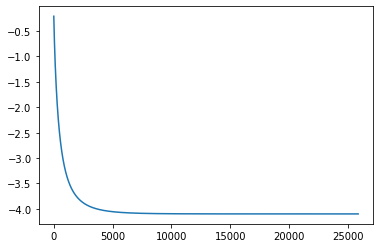

In [52]:
plt.plot(energy)

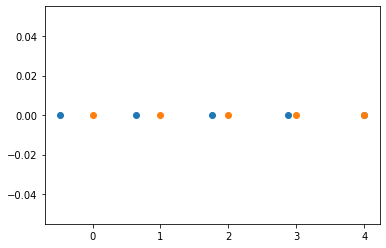

In [50]:
x=np.zeros_like(q_s)
a=1
u_0 = [i*a for i in range(N)]
plt.plot(q_s,x,"o")
plt.plot(u_0,x,"o")

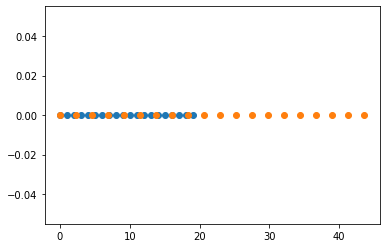

<Figure size 432x288 with 0 Axes>

In [16]:
# FOr 20 atoms
u_0 = [i for i in range(20)]
q=[0, 2.29444, 4.58888, 6.88332, 9.17777, 11.4722, 13.7666, 16.0611, 18.3555, 20.65, 22.9444, 25.2389, 27.5333, 29.8277, 32.122, 34.4166, 36.7111, 39.0055, 41.2999,43.5944]

x=np.zeros_like(u_0)
plt.plot(u_0,x,"o")
plt.plot(q,x,"o")
plt.show()